
<a id="1"></a> <br>
# Forewords  

The capstone project is to consolidate the learnings during the 6-month program of Google Analytics Professional Certificate. The structure of this project will follow the proposed steps, which are ask, prepare, process, analyze, share and act.

The case is fictional and made for the educational purpose. Therefore, I have attached all additional references researched, apart from the knowledge gained from the program.  




<a id="2"></a> <br>
# Business Overview: 

- Cyclistic is the bike-sharing program. Cyclistic has grown to a fleet of 5,824 bicycles thatare geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. 

- Cyclistic marketing strategy relied on building general awareness and appealing to broad customer segments with flexible pricing plan: single-ride-passes, full-ride passes (both referred to as casual riders) and annual memberships (referred to as annual members).

- Cyclistic finance analysts concluded that annual members are much more profitable than casual riders. Casual riders have chosen Cyclistic and had a high chance to purchase annual memberships.Therefore, Cyclistic decided to build a marketing plan to convert casual riders to annual members.

- Three questions are stated to provide insights for the incoming marketing plan: How do annual members and casual riders use Cyclistic bikes differently? Why would casual riders buy Cyclistic annual memberships? How can Cyclistic use digital media to influence casual riders to become members? For the scope of this project, the first question is assigned. 

<a id="3"></a> <br>
# I. ASK

1. Business task statement: Cyclistic (a bike sharing program) wants to examine the behavioural differences as insights to convert casual riders (single and day passes) to annual members.

2. Key stake holders: My manager Lily Moreno - the marketing director, marketing analytics team and the executive team.

3. Key questions for the project: 
 - What are differences in behaviors of casual riders and annual members?
 - How could Cyclistic motivate casual riders to become annual members? 


In [1]:
#Load all the necessary packages
library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data
library(geosphere) #helps calculate distances
library(gridExtra) 

#Input the Cyclistic trip data 2022 (from Kaggle)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




<a id="4"></a> <br>
# II. PREPARE
- Available data: Past 12 months of Cyclistic trip data.
1. Credibility of data:
- Data is collected first handed by Cyclistic, which is considered highly credible. 
2. Data Preparation
- The goal of this phase is to wrangle data and combine into one single file. 

In [2]:
#Load the data to respective variables
tripdata_202201<-read_csv("/kaggle/input/divvy-tripdata-2022/202201-divvy-tripdata.csv")
tripdata_202202<-read_csv("/kaggle/input/divvy-tripdata-2022/202202-divvy-tripdata.csv")
tripdata_202203<-read_csv("/kaggle/input/divvy-tripdata-2022/202203-divvy-tripdata.csv")
tripdata_202204<-read_csv("/kaggle/input/divvy-tripdata-2022/202204-divvy-tripdata.csv")
tripdata_202205<-read_csv("/kaggle/input/divvy-tripdata-2022/202205-divvy-tripdata.csv")
tripdata_202206<-read_csv("/kaggle/input/divvy-tripdata-2022/202206-divvy-tripdata.csv")
tripdata_202207<-read_csv("/kaggle/input/divvy-tripdata-2022/202207-divvy-tripdata.csv")
tripdata_202208<-read_csv("/kaggle/input/divvy-tripdata-2022/202208-divvy-tripdata.csv")
tripdata_202209<-read_csv("/kaggle/input/divvy-tripdata-2022/202209-divvy-tripdata.csv")
tripdata_202210<-read_csv("/kaggle/input/divvy-tripdata-2022/202210-divvy-tripdata.csv")
tripdata_202211<-read_csv("/kaggle/input/divvy-tripdata-2022/202211-divvy-tripdata.csv")
tripdata_202212<-read_csv("/kaggle/input/divvy-tripdata-2022/202212-divvy-tripdata.csv")

Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

<span style="color:#3F7856">From the loading info of csv files, column names seem to match between datasets. The data formats are different in columns , started_at and ended_at for datasets of May and June. We need to format character values to date-time to match. [(Referenced instructions)](https://ehsanx.github.io/intro2R/date-time-data-with-lubridate.html)</span>

In [3]:
# Check incongruences detected from two datasets
spec(tripdata_202205)
spec(tripdata_202206)

#Check NA values in the detected datasets (for future use)
sum(!complete.cases(tripdata_202205))
sum(!complete.cases(tripdata_202206))

cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_character(),
  ended_at = col_character(),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)

cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_character(),
  ended_at = col_character(),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)

[1] 132313

[1] 148854

In [4]:
#(Executed Once)Strip character values into default datetime in columns started_at and ended_at for May and June 
parsed_started_at_202205 <- strptime(tripdata_202205$started_at,"%Y/%m/%d %H%M")
parsed_ended_at_202205 <- strptime(tripdata_202205$ended_at,"%Y/%m/%d %H%M")
parsed_started_at_202206 <- strptime(tripdata_202206$started_at,"%Y/%m/%d %H%M")
parsed_ended_at_202206 <- strptime(tripdata_202206$ended_at,"%Y/%m/%d %H%M")

In [5]:
#Mutate datasets for May and June, assuming that milisecond is 00 due to missing values 
tripdata_202205 <- mutate(tripdata_202205,started_at=parsed_started_at_202205,ended_at=parsed_ended_at_202205)
tripdata_202206 <- mutate(tripdata_202206,started_at=parsed_started_at_202206,ended_at=parsed_ended_at_202206)

#Check the new datasets for May and June
head(tripdata_202205)
head(tripdata_202206)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EC2DE40644C6B0F4,classic_bike,23-05-20 22:23:00,23-05-20 22:23:00,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.89147,-87.62676,41.94367,-87.64895,member
1C31AD03897EE385,classic_bike,11-05-20 22:08:00,11-05-20 22:09:00,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.88096,-87.61674,41.88635,-87.61752,member
1542FBEC830415CF,classic_bike,26-05-20 22:18:00,26-05-20 22:18:00,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.88224,-87.64107,41.90765,-87.67255,member
6FF59852924528F8,classic_bike,10-05-20 22:07:00,10-05-20 22:07:00,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.88224,-87.64107,41.88458,-87.63189,member
483C52CAAE12E3AC,classic_bike,10-05-20 22:17:00,10-05-20 22:17:00,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.88224,-87.64107,41.88578,-87.65102,member
C0A3AA5A614DCE01,classic_bike,4-05-20 22:14:00,4-05-20 22:14:00,Carpenter St & Huron St,13196,Sangamon St & Washington Blvd,13409,41.89456,-87.65345,41.88316,-87.65110,member


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
600CFD130D0FD2A4,electric_bike,30-06-20 22:17:00,30-06-20 22:17:00,NA,NA,NA,NA,41.89,-87.62,41.91,-87.62,casual
F5E6B5C1682C6464,electric_bike,30-06-20 22:18:00,30-06-20 22:18:00,NA,NA,NA,NA,41.91,-87.62,41.93,-87.63,casual
B6EB6D27BAD771D2,electric_bike,30-06-20 22:11:00,30-06-20 22:12:00,NA,NA,NA,NA,41.91,-87.65,41.89,-87.61,casual
C9C320375DE1D5C6,electric_bike,30-06-20 22:11:00,30-06-20 22:11:00,NA,NA,NA,NA,41.80,-87.66,41.80,-87.65,casual
56C055851023BE98,electric_bike,29-06-20 22:23:00,29-06-20 22:23:00,NA,NA,NA,NA,41.91,-87.63,41.93,-87.64,casual
B664188E8163D045,electric_bike,30-06-20 22:16:00,30-06-20 22:16:00,NA,NA,NA,NA,42.03,-87.71,42.06,-87.73,casual


In [6]:
#Combine datasets into one file
all_trips <- bind_rows(tripdata_202201,tripdata_202202,tripdata_202203,tripdata_202204,tripdata_202205,tripdata_202206,tripdata_202207,tripdata_202208,tripdata_202209,tripdata_202210,tripdata_202211,tripdata_202212)

<a id="5"></a> <br>
# III. PROCESS <br>
Inspect the newly created file all_trips with the below functions: 
- colnames(all_trips)  #List of column names
- nrow(all_trips)  #How many rows are in data frame?
- dim(all_trips)  #Dimensions of the data frame?
- head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
- str(all_trips)  #See list of columns and data types (numeric, character, etc)
- summary(all_trips)  #Statistical summary of data. Mainly for numerics

In [7]:
#Inspect the newly created table
glimpse(all_trips)
head(all_trips)
tail(all_trips)
str(all_trips)
summary(all_trips)

Rows: 5,667,717
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-…
$ ended_at           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_cas

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7BDEDE9860418B53,classic_bike,2022-12-07 06:52:45,2022-12-07 06:56:36,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.88316,-87.65110,41.87764,-87.64962,member
43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.88316,-87.65110,41.87764,-87.64962,member
F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.94998,-87.71402,41.94340,-87.67962,member
A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.88314,-87.63724,41.88186,-87.64926,member
37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.88316,-87.65110,41.87764,-87.64962,member
2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,41.94815,-87.66394,41.94340,-87.67962,casual


spc_tbl_ [5,667,717 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5667717] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:5667717] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5667717], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:5667717], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:5667717] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:5667717] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:5667717] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:5667717] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:5

   ride_id          rideable_type        started_at                 
 Length:5667717     Length:5667717     Min.   :1-05-20 22:00:00     
 Class :character   Class :character   1st Qu.:2022-01-05 09:20:32  
 Mode  :character   Mode  :character   Median :2022-07-22 15:03:59  
                                       Mean   :1525-10-12 20:45:21  
                                       3rd Qu.:2022-09-16 07:21:29  
                                       Max.   :2022-12-31 23:59:26  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :1-05-20 22:00:00      Length:5667717     Length:5667717    
 1st Qu.:2022-01-05 09:41:15   Class :character   Class :character  
 Median :2022-07-22 15:24:44   Mode  :character   Mode  :character  
 Mean   :1525-10-12 21:30:39                                        
 3rd Qu.:2022-09-16 07:39:03                                        
 Max.   :2023-01-02 04:56:45      

In [8]:
#Check how many NA are in all_trips
sum(!complete.cases(all_trips))

#Check which columns contain most NA
colSums(is.na(all_trips))

[1] 1298357

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            833064             833064             892742             892742 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               5858               5858 
     member_casual 
                 0

<span style="color:#3F7856">**Less 1,300,000 entries with missing values are mostly station location variables, randomly distributed in months. The missing values accounts for less than 23% of the dataset and should be omitted for better analysis.**</span>

[References](https://rpubs.com/JonathanPiscart/Cyclistic_Case_Study) for generating a distance columns from two columns of latitudes and longtitudes

In [9]:
# Drop rows with NA values in any columns 
all_trips <- drop_na(all_trips)


<span style="color:#3F7856">Next up, we create calculated columns for more insights. New columns include time columns(date,month,year,day_of_week) ride_duration, ride_distance, ride speed. However, the ride distance and ride speed are approximately calculated by calculating the ellipisoidal distances between dock locations when users pick and return bikes. </span>

In [10]:
#Create columns for year, month, day, day of the week to retrieve data at various levels. 

all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

#Create the column of trip duration in seconds:
all_trips$ride_duration_secs <- difftime(all_trips$ended_at,all_trips$started_at)

#Create the column of dock distance in km (ellipsoidal distance)
dock_distance_m <- distGeo(matrix(c(all_trips$start_lng, all_trips$start_lat), ncol = 2), matrix(c(all_trips$end_lng, all_trips$end_lat), ncol = 2))
all_trips$ride_distance_km <- dock_distance_m/1000

#Create the column of ride speed
all_trips$ride_speed_kmH = c(all_trips$ride_distance_km)/as.numeric(c(all_trips$ride_duration_secs), units="hours")

In [11]:
#Drop "bad" data of few hundred entries when bikes were taken out of docks and checked for quality. 

all_trips_clean <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_duration_secs<0),]

#Check on the dataset with new columns added
head(all_trips_clean)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,date,month,day,year,day_of_week,ride_duration_secs,ride_distance_km,ride_speed_kmH
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>,<dbl>,<dbl>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,⋯,-87.67437,casual,2022-01-13,01,13,2022,Thursday,177 secs,0.7013791,14.265337
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,⋯,-87.67437,casual,2022-01-10,01,10,2022,Monday,261 secs,0.6961414,9.601950
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,⋯,-87.66580,member,2022-01-25,01,25,2022,Tuesday,261 secs,1.0034507,13.840699
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,⋯,-87.67139,casual,2022-01-04,01,04,2022,Tuesday,896 secs,2.4601250,9.884431
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,⋯,-87.62783,member,2022-01-20,01,20,2022,Thursday,362 secs,0.8140730,8.095754
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,⋯,-87.67394,member,2022-01-11,01,11,2022,Tuesday,202 secs,0.8456658,15.071271


<a id="6"></a> <br>
# IV. ANALYSE

We have now prepared the data sets ready for analysing. In order to identify the differences in behaviors of casual riders and annual members, we need to make use of the available data, including: location data (ride distance, start location, end location), time data (ride duration, month, day of the week, time of the day), other calculated data (bike types, ride frequencies, ride speed).

We have sketched a few hypotheses regarding the behaviors in using Cyclistic bikes:
- Purposes: recreation, commute, exercises.


Recommended charts: 
- General ones: mean ride duration, mean distance, ride count, bike types/ year
- Weekly and daily patterns: ride count / day in week / office and non-office hours


<span style="color:#3F7856">**First we will investigate the overall factors: differences in mean ride duration, mean distance, favored bike types, ride frequencies during the week by user types**</span>.

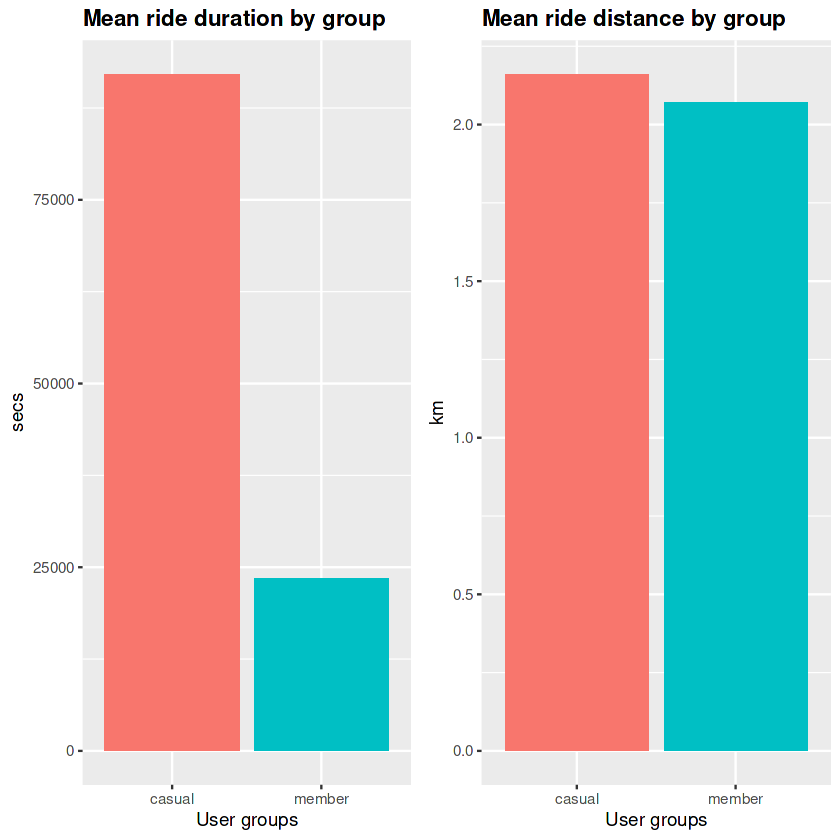

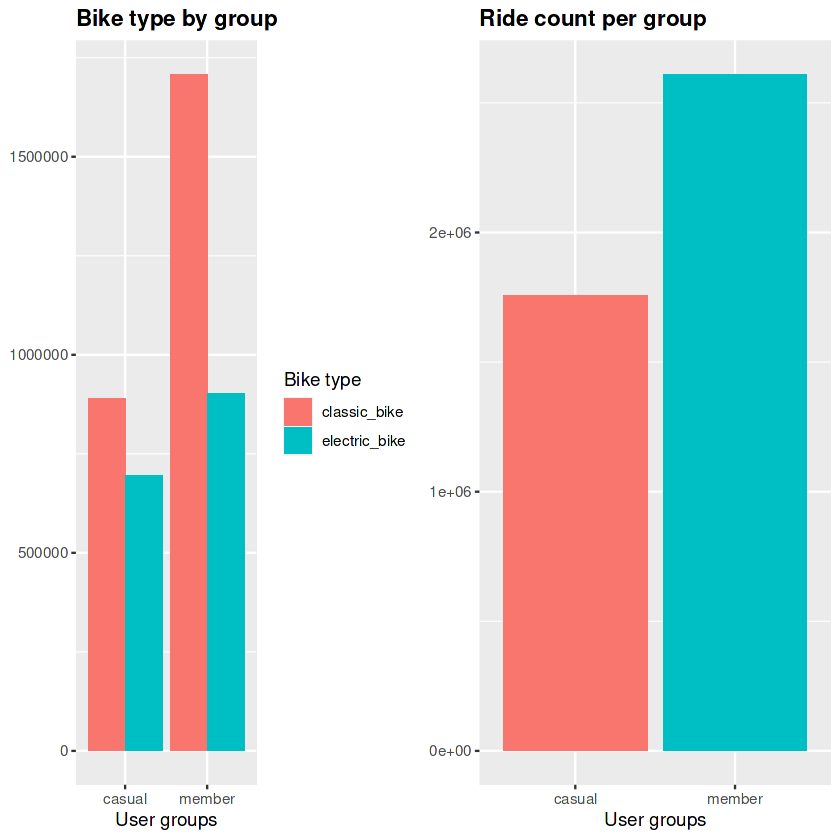

In [12]:
#Calculate means of time and distance for each user group to gain overview

groups_means <- all_trips_clean %>% group_by(member_casual) %>% summarise(mean_time = mean(ride_duration_secs),mean_distance = mean(ride_distance_km),n())


#Plot into two barcharts of mean ride duration and mean ride distance by user groups

time_plot <- ggplot(groups_means) + 
                geom_col(mapping=aes(x=member_casual,y=as.numeric(mean_time),fill=member_casual), show.legend=FALSE)+
                labs(title = "Mean ride duration by group",x="User groups",y="secs")+
                theme(plot.title = element_text(face = "bold"))

distance_plot<- ggplot(groups_means) + 
                geom_col(mapping=aes(x=member_casual,y=mean_distance,fill=member_casual), show.legend=FALSE)+
                labs(title = "Mean ride distance by group",x="User groups",y="km")+
                theme(plot.title = element_text(face = "bold"))


grid.arrange(time_plot, distance_plot, nrow=1)

# Bike type table without docked :
bike_type_table <- all_trips_clean %>% filter(rideable_type=="classic_bike" | rideable_type=="electric_bike")

#Then lets check the bike type usage by user type:

bike_type_plot <- bike_type_table %>%
                    group_by(member_casual,rideable_type) %>%
                    summarise(totals=n(), .groups="drop")  %>%
                    ggplot()+
                        geom_col(aes(x=member_casual,y=totals,fill=rideable_type), position = 'dodge') + 
                        labs(title = "Bike type by group",x="User groups",y=NULL, fill="Bike type") +
                        theme(plot.title = element_text(face = "bold"))

ride_count_plot <- all_trips_clean %>%
                    group_by(member_casual)%>% 
                    summarise(totals=n()) %>%
                    ggplot()+
                        geom_col(mapping=aes(x=member_casual,y=totals, fill=member_casual), show.legend=FALSE) + 
                        labs(title = "Ride count per group", x= 'User groups', y=NULL) +
                        theme(plot.title = element_text(face = "bold"))

grid.arrange(bike_type_plot, ride_count_plot, nrow=1)



<span style="color:#3F7856"> **Findings:** </span>

- Casual riders have much higher mean ride duration with the quite similar mean ride distance. This can conclude that casual riders ride more slowly, more resting or wandering than the members. 

- Casual riders' number of rides is two thirds that of members. 

- Both groups prefer classic bikes over electric bikes. However, members are strongly inclined to choose classic bike. (Assuming that both options are all available). 

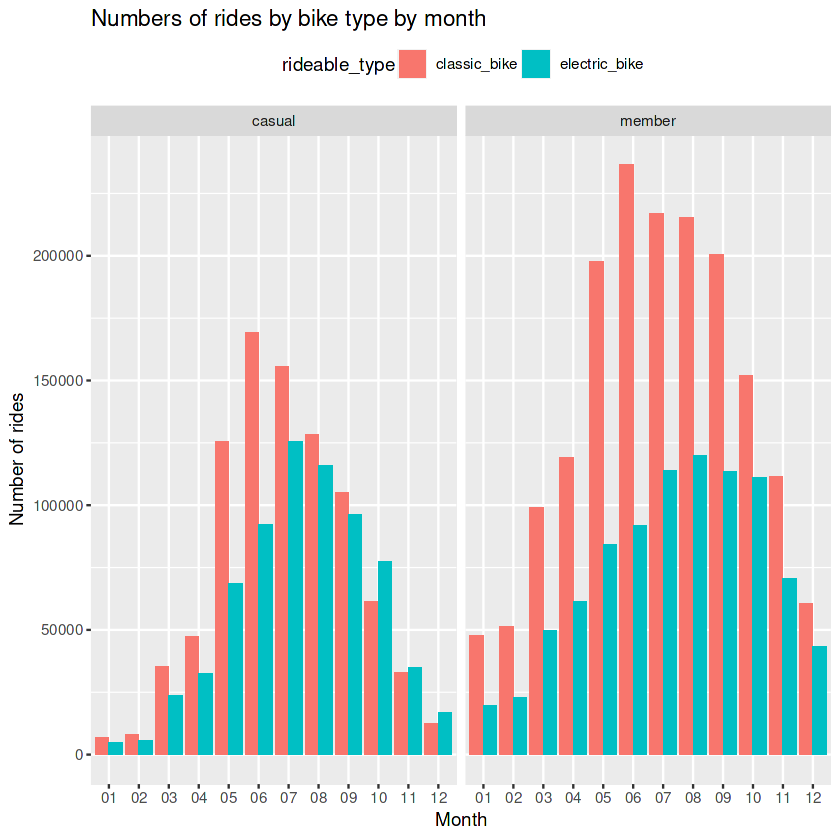

In [13]:
# Bike types across months

bike_type_table %>%  
  group_by(month,rideable_type, member_casual) %>% 
  summarise(number_of_rides = n(), .groups='drop') %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") +
  facet_wrap(~member_casual) +
  labs(title = "Numbers of rides by bike type by month",x="Month",y="Number of rides") +
  theme(legend.position="top")

<span style="color:#3F7856"> **Findings:** </span>

Both groups tend to use much more bikes from May to October, supposed as the warm season. During the warm season, the member tend to use classic bikes much more. 

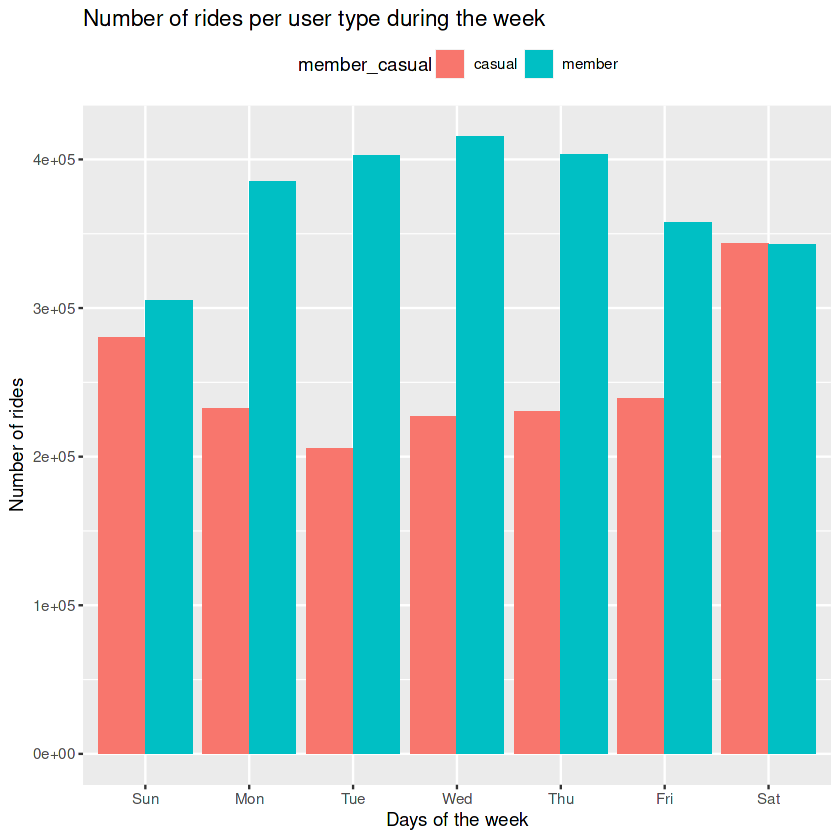

In [14]:
#The we check  the number of rides diferences by weekday:
all_trips_clean %>% 
  mutate(week_day = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, week_day) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_duration_secs), .groups='drop') %>% 

  ggplot(aes(x = week_day, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of rides per user type during the week",x="Days of the week",y="Number of rides") +
  theme(legend.position="top")


<span style="color:#3F7856"> **Findings:** </span>

- Casual riders uses bikes more often at weekends, especially Saturday. 
- Members tend to use bikes more during weekdays and less towards the weekends. 

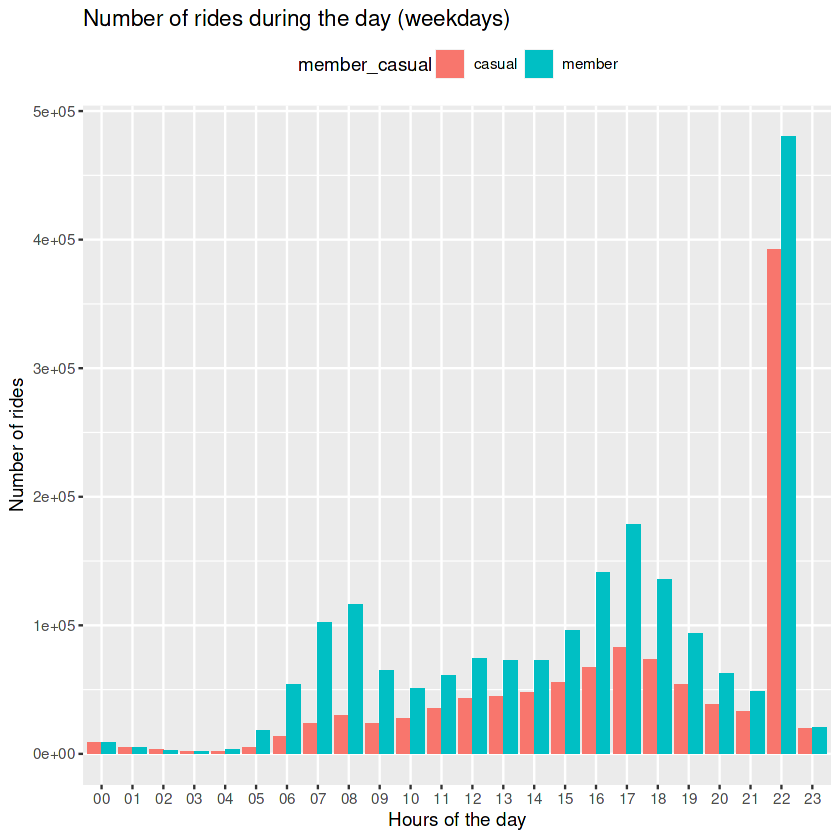

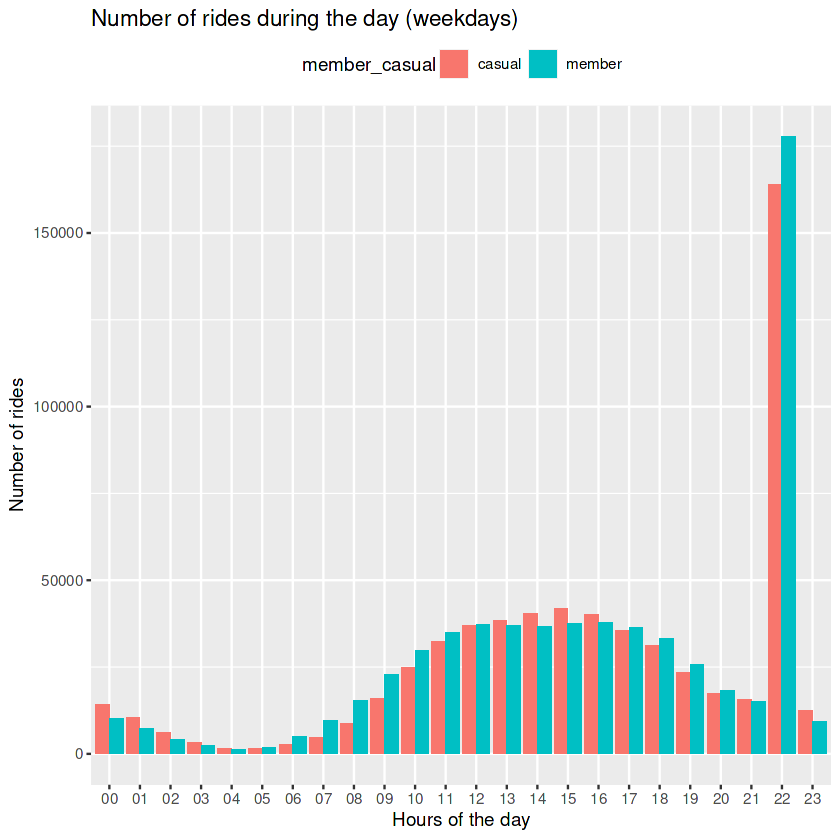

In [15]:
#Check the number of rides by hours in the day

all_trips_clean %>% 
  filter(!(day_of_week=='Sunday'|day_of_week=='Saturday'))%>%
  mutate(started_at_hour = format(as.POSIXct(started_at), format = "%H") ) %>% 
  group_by(member_casual, started_at_hour) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_duration_secs), .groups='drop') %>% 
  ggplot(aes(x = started_at_hour, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of rides during the day (weekdays)",x="Hours of the day",y="Number of rides") +
  theme(legend.position="top")


all_trips_clean %>% 
  filter((day_of_week=='Sunday'|day_of_week=='Saturday'))%>%
  mutate(started_at_hour = format(as.POSIXct(started_at), format = "%H") ) %>% 
  group_by(member_casual, started_at_hour) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_duration_secs), .groups='drop') %>% 
  ggplot(aes(x = started_at_hour, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of rides during the day (weekdays)",x="Hours of the day",y="Number of rides") +
  theme(legend.position="top")

<span style="color:#3F7856"> **Findings:** </span>

- During weekdays, the annual members and casual used bikes most around the start and end of office hours (8 & 17). However, the usage of members are more drastic. 

- There are more bikes used after than before the office hours. 

- During weekends the bike usage is less.The number of rides used by casual riders and members are quite similar for mostly recreational activities spanning from 10am to 18pm. 

- Unexpected surge in usage happened at 22 p.m in both weekdays and weekends, which requires further investigation analysis

start_station_name,station_count
<chr>,<int>
Streeter Dr & Grand Ave,22150
DuSable Lake Shore Dr & North Blvd,12886
DuSable Lake Shore Dr & Monroe St,12306
Michigan Ave & Oak St,11994
Wells St & Concord Ln,10490
Theater on the Lake,10252
Millennium Park,9897
Clark St & Elm St,8863
Clark St & Armitage Ave,8677


end_station_name,station_count
<chr>,<int>
Streeter Dr & Grand Ave,22276
DuSable Lake Shore Dr & North Blvd,14208
Michigan Ave & Oak St,12268
DuSable Lake Shore Dr & Monroe St,12073
Theater on the Lake,10495
Wells St & Concord Ln,10178
Millennium Park,9828
Clark St & Elm St,8966
Clark St & Armitage Ave,8630


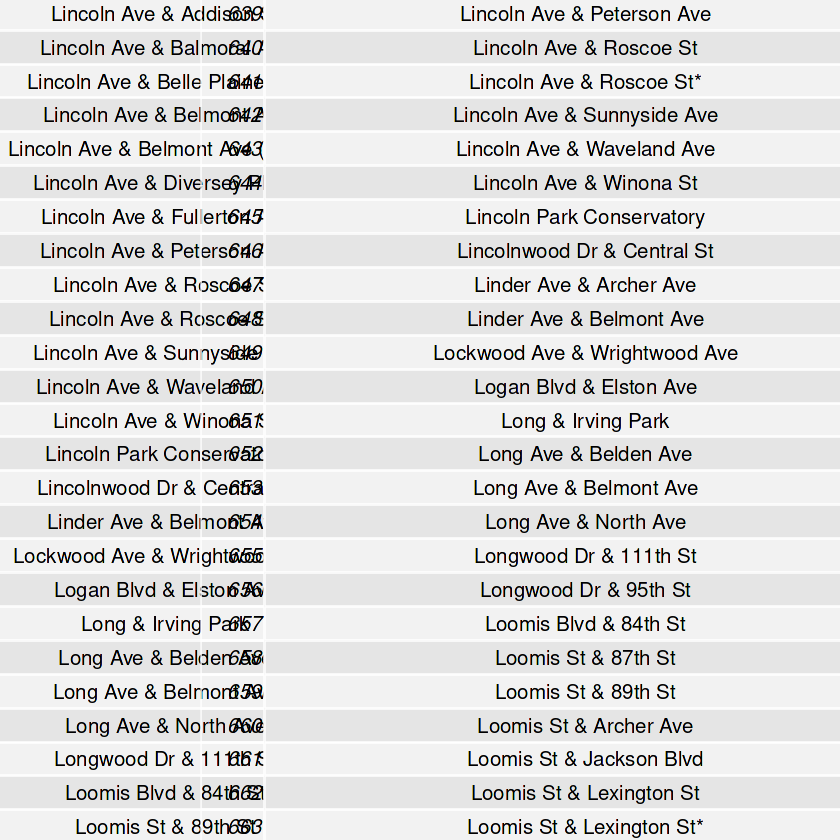

In [16]:
#Start at 22, start where and go where?
ten_hour_start <- all_trips_clean %>% filter((format(as.POSIXct(started_at), format = "%H")=='22'))%>%group_by(start_station_name)%>%summarise(station_count=n())
ten_hour_end <- all_trips_clean %>% filter((format(as.POSIXct(started_at), format = "%H")=='22'))%>%group_by(end_station_name)%>%summarise(station_count=n())
ten_hour_start%>%arrange(desc(station_count))%>%head(10)
ten_hour_end%>%arrange(desc(station_count))%>% head(10)

grid.arrange(tableGrob(ten_hour_start),tableGrob(ten_hour_end),nrow=1)

<span style="color:#3F7856"> **Findings:** </span>

- After a quick look at exact locations people started and headed at 22, we have not detected yet the reason of the surge. 

<a id="7"></a> <br>
# V. SHARE

Using behaviors: 

- Casual riders have much higher mean ride duration with the approximately similar mean ride distance. Which means they drive more slowly, an indicator of creational activities. Casual riders occupied the bikes more, which might affect the bike availability. 

Bike choice behaviors: 
- Classic bikes are favored more than electric bikes in general. The preference is much more drastic during the warm weather (from May to October) reaching its peak at July and August. 

Monthly behaviors: 

- Both groups tend to use much more bikes from May to October, supposed as the warm season. However the shift is more steep and drastic in casual riders. During the warm season, the member tend to use classic bikes much more. 

Weekly and daily behaviors: 

- During weekends the bike usage is less than in weekdays. The number of rides used by both groups are quite similar for mostly recreational activities spanning alost evenly from 10am to 18pm. 
- The bike usages peak at around 8am and 17pm for both groups. At 17pm and for the member group, the peak is much more drastic. This is a sign of using Cyclistic bikes for commute in a majority of members and also a part of casual riders. 

Outliner: 
- At 22 p.m, there is a surge in usage. An occasional event or some cutural factor could possibly cause this. After looking at the locations by table, the starting and ending locations are randomized by stations. Recommended qualitative analysis or map cluster visualisation (due to the limitations of the environment, google map can not be retrieved)

<a id="8"></a> <br>
# VI. ACT

1. Customer personas: 
- Members: More steady users, who use bikes much more frequently for possibly commute with shorter occupancy. Members favors classic bikes, espeically during the warm season. 

- Casual riders: More steady users, who use bikes much less frequently for possibly recreational activities with higher occupancy and a small group for commute. Casual riders have almost fair preferences for both bike types and also enjoy using bikes during warm season. 

2. Actionable insights

- The time with most usage are from May to October (monthly), during weekdays ( weekly), 8 a.m or 17p.m (daily). Therefore Cyclistic can do the suggested content for the following time point. Therefore, Cyclistic could put more marketing efforts at before and during warm seasons, ending of the weekends or prior to the morning and evening rush hours. 

- As the members are riding bikes more like a healthy lifestyle, proven by steadiness and the choice of classic bikes, this content angle could also be implemented and tested to convert the casual riders.

- A noticeable group of casual riders are now using Cyclistic occasionally for commute. A promotion for new users targeting this group can be strategic to convert. 